<a href="https://colab.research.google.com/github/krnvz/Analisis-exploratorio-basico/blob/master/MK1_Regresion_logistica_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MK1**

## **REGRESIÓN LOGÍSTICA**

Soy nuevo en el mundo de ML y la programación y esta sera mi primera regresión logistica :P. Ya que como es sabido, *una de las mejores formas de aprender es practicar*, asi que aqui vamos!!!


Se usaran los datos del dataset Iris, disponible en la libreria **sklearn** a los que se le aplicara una  Regresion Logistica básica como algoritmo de Predicción/Clasificación 


---


#### LIBRERIAS
Comenzamos por importar las librerias necesarias!

In [3]:
import numpy as np 
import pandas as pd
import matplotlib as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler 
import seaborn as sn


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### CARGAR DATASET
Debemos cargar los datos de la libreria **sklearn** y convertirlo en los formatos preferidos. En este caso se convierten en **DataFrame** de *pandas* .

In [4]:
# Data set cargado.
iris = load_iris()
x = iris.data
y = iris.target
# Transformarlo a DataFrame para visualizarlo
df = pd.DataFrame(x,columns = iris.feature_names)
df['species_id'] = y #se junto el dataset x e y en uno llamado df
species_map = {0:'setosa',1:'versicolor',2:'virginica'}#definir cual es el nombre por cada id de especies 
df['species_name'] = df['species_id'].map(species_map) #mapeo y asignación a una nueva columna dentro del df
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### EXPLORACIÓN DE DF
Podemos visualizar las tendencias de las variables involucradas en df mediante un **pairplot** de *seaborn*. Con ``` .describe ``` podemos obtener estadistica descriptiva de una forma rapida (medidas de tendencia central y de dispersión).



In [5]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


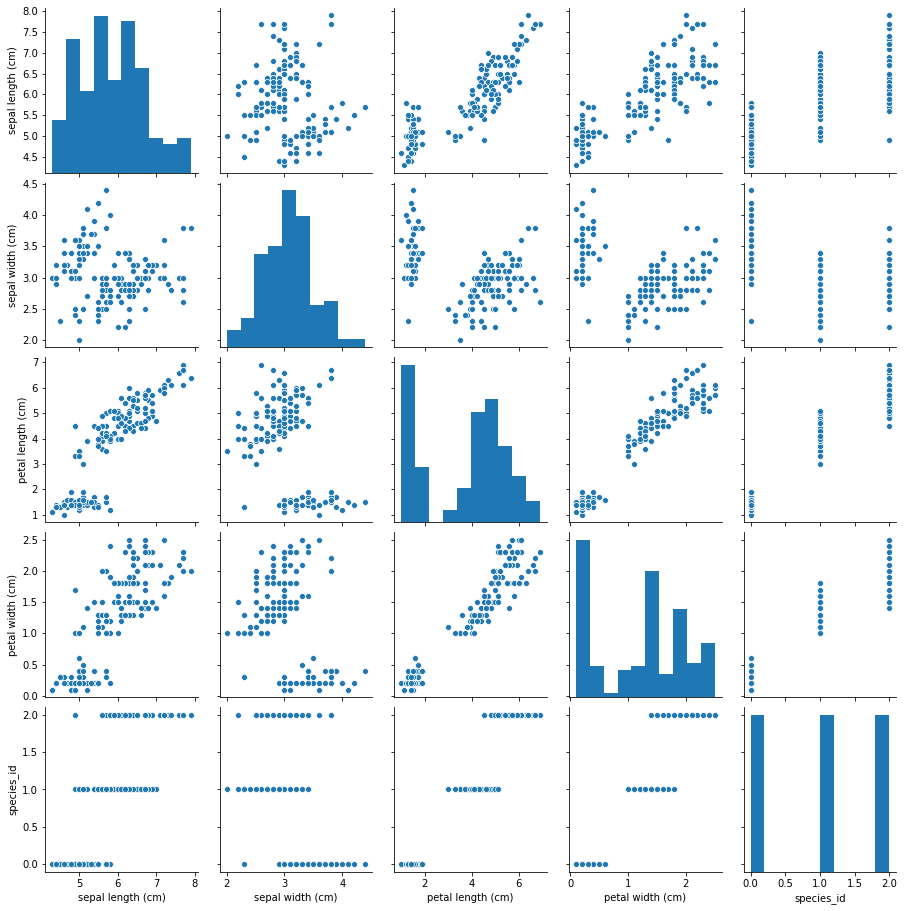

In [6]:
#un pairplot 
sn.pairplot(df)

#### DEFINICIÓN DEL MODELO
Vamos a reconocer las **setosas** de las demas especies de df. Para ello debemos corregir los *target* :

*   desde --> setosa: 0, versicolor: 1 ,virginica: 2
*   a --> setosa: 0, virginica y versicolor: 1

Luego, se separara el df en un conjunto de entrenamiento (*x_train, y_train*), y un conjunto de validación (x_test, y_test). En este caso el 80% de los datos seran para entrenamiento y el 20% restante se asignara al conjunto de validacion, usando el parametro ```test_size = 0.2 ```

Con estos nuevos sub dataset, ya podemos asignar y entrenar el modelo de **Regresión Logística** con los datos de entrenamiento.




In [7]:
y1 = np.where(y==2, 1, y) #cuando el valor en y sea igual a 2, cambiarlo por un 1. Si no es asi, conservar el valor de y

In [8]:
x_train, x_test, y_train ,y_test = train_test_split(x, y1, test_size = 0.2, random_state = 42)# division del df 80% 20%
model = LogisticRegression() #asignacion del modelo
model.fit(x_train, y_train) #entrenar el modelo con los datos
print('Son {} datos para entrenamiento y {} datos para prueba'.format(x_train.shape[0], x_test.shape[0]))


Son 120 datos para entrenamiento y 30 datos para prueba


#### PREDICCIÓN 
Con el modelo listo, podemos usarlo para predecir usando el conjunto de validación (```x_test```)

Usaremos la **matriz de confusión** para conocer las predicciones, que se presentan de la siguiente forma:
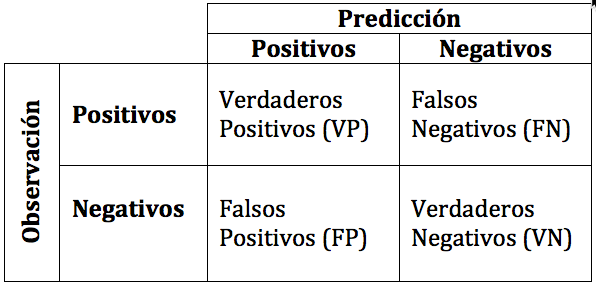

In [9]:
prediccion  = model.predict(x_test)

In [10]:

confusion_matrix(y_test, prediccion)

array([[10,  0],
       [ 0, 20]])

#### AJUSTE DE UMBRAL

Se puede cambiar el umbral para modificar el criterio de clasificación. En esta ocascion se usará un bucle ```for``` para iterar 100 ubrales diferentes en un rango entre 0 y 1 a un paso de 0,01. Para conocer el comportamiento del modelo con dichos umbrales, se usaran ciertas metricas  enfocadas en medir la calidad del modelo.

Para eso debemos calcular la **matriz de estimaciones de probabilidad** usando ```predict.proba()```de *sklearn*, que nos muestra la probabilidad de clasificar la variable como categoria 0 y la de clasificar la variable como categoria 1.

In [11]:
corr_matrix = model.predict_proba(x_test)

In [ ]:
umbral = range(10,101,1)

#print(umbral)
for x in umbral:
  x = x/100
  pred_n = np.where(corr_matrix[:,1]>x,1,0)
  #print('Para un umbral de {} -->  Acurracy: {} \t Precision: {} \t Recall: {}'.format(x,accuracy_score(y_test,pred_n),precision_score(y_test,pred_n),recall_score(y_test,pred_n)))
  print('Umbral {} \n matriz : \n {}'.format(x,classification_report(y_test, pred_n)))

Al cambiar el umbral se observa que no interfiere en los resultados aparentes hasta el valor 0.94 en el que las metricas como recall, accurency y f1, disminuyen. Sin embargo, las matrices de confusión no cambiaron. Por lo tanto, usaremos la regresion de sklearn, que usa por defecto un umbral de 0,5. Con las siguientes metricas:

In [16]:
metricas = classification_report(y_test, prediccion)
print(metricas)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
#Vamos a reconocer Virginicas, de las otras especies.
# #0 setosa, 1 versicolor, 2 virginica; por lo tanto las Setosas y las versicolor debemos dejarla en una sola clasificacion
#virginica  = 0 ,  setosa y versicolor = 1
y1_vig = np.where(y==0, 1, y) 
y1_vig = np.where(y1_vig==2, 0, y1_vig) 
y1_vig


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
#conjuntos de entrenamiento y validación
#bibliotecas necesarias 
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
x_train_2, x_test_2, y_train_2 ,y_test_2 = train_test_split(x, y1_vig, test_size = 0.33, random_state = 42)
model_virg = LogisticRegression() #asignacion del modelo
model_virg.fit(x_train_2, y_train_2) #entrenar el modelo con los datos
print('Son {} datos para entrenamiento y {} datos para prueba'.format(x_train.shape[0], x_test.shape[0]))


TypeError: ignored

In [ ]:
#predicción
pred_virg = model.predict(x_test)

In [ ]:
#matriz de correlación 
corr_matrix_virg = model_virg.predict_proba(x_test)
corr_matrix_virg

In [ ]:
#biblioteca necesaria 
#from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediccion)

In [ ]:
umbral_virg = range(10,101,1)

#print(umbral)
for x in umbral_virg:
  x = x/100
  pred_n = np.where(corr_matrix[:,1]>x,1,0)
  #print('Para un umbral de {} -->  Acurracy: {} \t Precision: {} \t Recall: {}'.format(x,accuracy_score(y_test,pred_n),precision_score(y_test,pred_n),recall_score(y_test,pred_n)))
  print('Umbral {} \n matriz : \n {}'.format(x,classification_report(y_test, pred_n)))

Al igual que en el caso de las Setosas, el comportamiento del modelo medido en precision, recall, f1-score y matriz de confusión, de la predicción de Virginica, se altera al momento de alcanzar un umbral de 0.94 o mas (paso=0.1)
Aun que a causa de la pequeña cantidad de datos, no se puede concluir si realmente el cambio de umbral no afecta de una forma significativa el comportamiento de la predicción. 





In [ ]:
X = x_train

In [ ]:
escalar = StandardScaler
x_train_3 = escalar.fit_transform(X )
x_test_3 = escalar.transform(x_test)
model_3 = LogisticRegression()
model_3.fit(x_train_3,y_train_3)
pred_3 = model_3.predict()